<a href="https://colab.research.google.com/github/blue-within-blue-ice/machineLearning/blob/main/BT_1_Regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Nauczanie maszynowe/Ćwiczenia1

Uczenie maszynowe można podzielić na:

- Uczenie nadzorowane (z nauczycielem) - na podstawie danych $(x_i, y_i)$ uczymy się funkcji $f_{\theta}$, takiej że $y_i \approx f_{\theta}(x_i)$
- Uczenie nienadzorowane (bez nauczyciela) - na podstawie danych $(x_i)$ uczymy się $p(x;\theta) = \sum_z p(x|z;\theta)p(z;\theta)$
- Uczenie ze wzmocnieniem - uczymy się polityki $\pi(a|x)$


Będziemy zajmować się przede wszystkim  uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr $\theta$ rozważmy różnego typu funkcje kosztu.

W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie regresji lub klasyfikacji.

Modele dyskryminatywne a generatywne

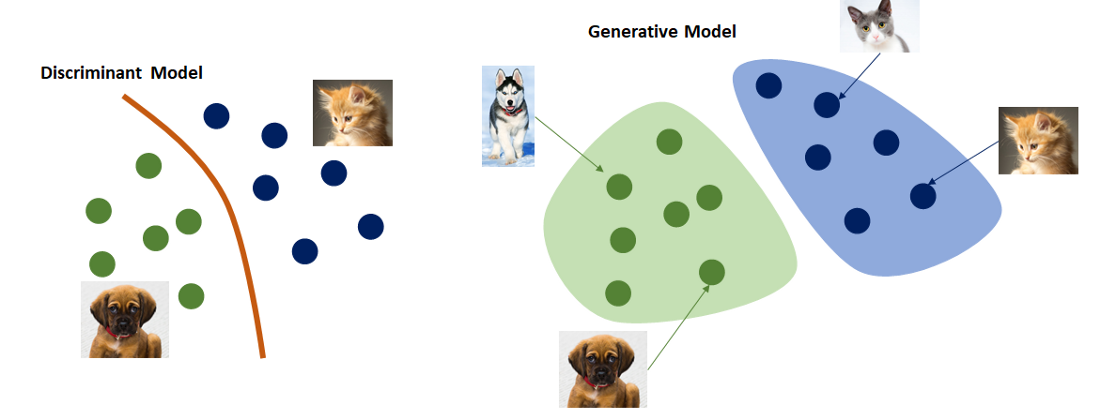

In [ ]:
from IPython import display
display.Image("disc_gen.png", width="800", height="500")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

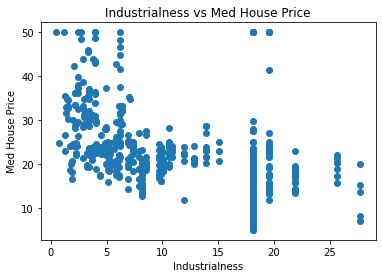

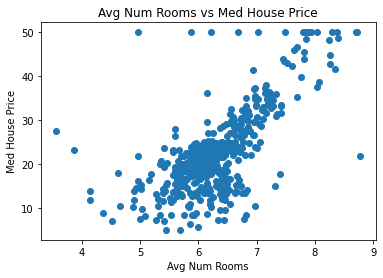

In [4]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [5]:
def loss_function(w1, w2, w0, X, t):
   linear_f = [(w1 * X[i][0] + w2 * X[i][1] + w0 - t[i])**2 for i in range(len(X))]
   return sum(linear_f)/(2*len(X))

In [6]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [7]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

20.61716585276679

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

Często na początku nie mamy informacji o tym jakie powinny być parametry modelu; możemy zacząć od losowych wartości. Pojawia się więc pytanie jak je aktualizować aby wartości funkcji kosztu były coraz mniejsze? Jedno z najpopularnieszych podejść (i stanowiące podstawę do innych algorytmów) jest opartę o metodę spadku gradientu (Gradient Descent). Liczymy pochodną funkcji kosztu po rozważanych parametrach a następnie aktualizujemu je wg:

<center> 
$w_{new} = w_{old} - \eta \cdot \frac{d LF}{dw}$

In [8]:
def update_weights(w1, w2, w0, X, t, eta):
    dw1 = sum([2 * X[i][0] * (w1 * X[i][0] + w2 * X[i][1] + w0 - t[i]) for i in range(len(X))])/(2*len(X))
    dw2 = sum([2 * X[i][1] * (w1 * X[i][0] + w2 * X[i][1] + w0 - t[i]) for i in range(len(X))])/(2*len(X))
    dw0 = sum([2 * (w1 * X[i][0] + w2 * X[i][1] + w0 - t[i]) for i in range(len(X))])/(2*len(X))

    return (w1 - eta * dw1, w2 - eta * dw2, w0 - eta * dw0)

In [9]:
#przykladowe wywolanie
update_weights(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

In [10]:
def lin_reg(X, t, eta, w1_start=1, w2_start=1, w0_start=1, iterations=1000):
  w1 = w1_start
  w2 = w2_start
  w0 = w0_start

  results = list()

  for i in range(iterations):
    results.append(loss_function(w1, w2, w0, X, t))
    new_weights = update_weights(w1, w2, w0, X, t, eta)
    w1, w2, w0 = new_weights

  return results

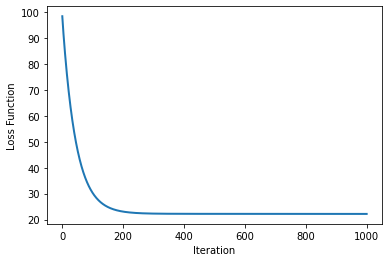

In [11]:
x = np.linspace(0, 1000, 1000)
y = lin_reg(d2, target, 0.001)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.xlabel('Iteration')
plt.ylabel("Loss Function")
plt.show()

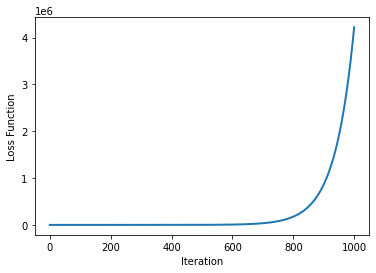

In [25]:
x = np.linspace(0, 1000, 1000)
y = lin_reg(d2, target, 0.01)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.xlabel('Iteration')
plt.ylabel("Loss Function")
plt.show()

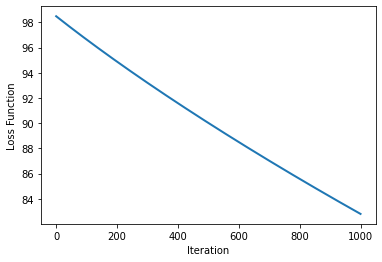

In [13]:
x = np.linspace(0, 1000, 1000)
y = lin_reg(d2, target, 0.00001)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.xlabel('Iteration')
plt.ylabel("Loss Function")
plt.show()

Dla η równego 0.001 minimum jest znalezione szybko, wykres jest gładki - wydaje się to być najbardziej optymalną wartością tego hiperparametru. W przypadku mniejszego η, funkcja znalazła minimum, ale po pewnym czasie z niego "wyskoczyła", a następnie wartość LF zaczęła bardzo szybko rosnąć - dla większej ilości iteracji, można się spodziewać, że nadal będzie szła ona w górę. Dla 0.00001 wpływ η jest tak mały, że funkcja jest prawie idealnie liniowa. Różnice energii są bardzo małe między iteracjami, co później okaże się problemem.

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [20]:
def lin_reg_modified(X, t, eta, w1_start=1, w2_start=1, w0_start=1, iterations=1000, max_diff_perct=0.1):
  w1 = w1_start
  w2 = w2_start
  w0 = w0_start

  results = list()

  for i in range(iterations):
    results.append(loss_function(w1, w2, w0, X, t))
    new_weights = update_weights(w1, w2, w0, X, t, eta)
    w1, w2, w0 = new_weights

    if i >= 1 and ((results[i-1] - results[i]) / results[i]) * 100 < max_diff_perct:
      break

  return results

In [22]:
len(lin_reg_modified(d2, target, 0.001))

193

In [23]:
len(lin_reg_modified(d2, target, 0.01))

28

In [24]:
len(lin_reg_modified(d2, target, 0.00001))

2

Widać, że ograniczenie do 0.1% zmiany jest zbyt surowe dla η = 0.00001. Spowodowało to, że praca została od razu zakończona. Dla niższych wartości ograniczenia, można uzyskać bardziej precyzyjne określenie kroku na którym zatrzymała się funkcja.

In [31]:
len(lin_reg_modified(d2, target, 0.00001, max_diff_perct=0.01))

1000

Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(d2, target);

In [34]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [35]:
model.intercept_ #wyraz wolny

-22.89831572922507

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

In [36]:
r_sq = model.score(d2, target) #R2 modelu
r_sq

0.5362984005856312

In [37]:
y_pred = model.predict(d2) #przewidywane y
y_pred[:5]

array([27.75850755, 24.96067296, 30.93672306, 31.11074967, 32.27623588])

In [38]:
lin_reg_modified(d2, target, 0.001)[:5]

[98.48533192391298,
 96.60796574461425,
 94.83781372524,
 93.14884053482177,
 91.52413439098214]

Różnica wynika najprawdopodobniej z rozpoczęcia od innych wartości wag.

<h3> Co jeżeli dane nie są liniowe?

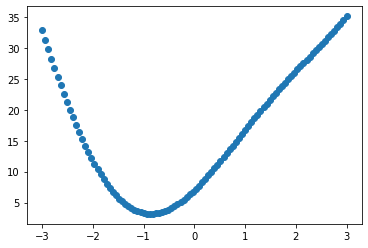

In [ ]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko $x$ oraz $y$ oraz znana jest zależność między nimi, tzn $y=ax^2+b \sin x +c$, przy czym $a,b,c$ są nieznane.

In [ ]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y #zmienia wartość targetu, zdefiniowanego wcześniej... >:(

In [ ]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weights(w1, w2, w0, X, target, 0.001)

In [ ]:
w1, w2, w0

(3.614594503075783, 3.614594503075783, 3.614594503075783)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

<h3> Parametry modelu a hiperparametry

- parametry modelu ($w_1, w_2, w_0$)
- hiperparametry (np. $\eta$), są zewnętrzne wobec modelu

Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór treningowy, zbiór walidacyjny oraz zbiór testowy.

Ogólnie:
- Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
- Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
- Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [39]:
from sklearn.model_selection import train_test_split

* Podział na zbiory

In [40]:
def three_way_split(X, t):
  X_train, X_rest, t_train, t_rest = train_test_split(X, t, test_size=0.4)
  X_val, X_test, t_val, t_test = train_test_split(X_rest, t_rest, test_size=0.5)
  
  return X_train, X_val, X_test, t_train, t_val, t_test

In [41]:
d2_train, d2_val, d2_test, target_train, target_val, target_test = three_way_split(d2, target)

* Test hipermarametru η na zbiorze walidacyjnym

In [52]:
lin_reg_modified(d2_val, target_val, 0.0001)[-1]

28.431683654362025

In [53]:
lin_reg_modified(d2_val, target_val, 0.001)[-1]

16.812287393535627

In [54]:
lin_reg_modified(d2_val, target_val, 0.01)[-1]

38.422941430341005

In [55]:
lin_reg_modified(d2_val, target_val, 0.00001, max_diff_perct=0.001)[-1]

76.92734242655554

Najlepsza wydaje sie wartość η równa 0.001.

* Trening parametrów modelu na zbiorze treningowym

In [58]:
def lin_reg_weights_pair(X, t, eta, w1_start=1, w2_start=1, w0_start=1, iterations=1000) -> dict:
  w1 = w1_start
  w2 = w2_start
  w0 = w0_start

  results = dict()

  for i in range(iterations):
    results[loss_function(w1, w2, w0, X, t)] = w1, w2, w0
    new_weights = update_weights(w1, w2, w0, X, t, eta)
    w1, w2, w0 = new_weights

  return results

In [59]:
training_dict = lin_reg_weights_pair(d2_train, target_train, 0.001)
list(training_dict.values())[-1]

(-0.5052362203721659, 4.259692892546455, 1.2703337153767915)

* Wyznacznie wartości funkcji kosztów na zbiorze testowym z wykorzystaniem parametrów i hiperparametrów uzyskanych wcześniej.

In [63]:
lin_reg(d2_test, target_test, 0.001, w1_start=-0.5052362203721659, w2_start=4.259692892546455, w0_start=1.2703337153767915)[-1]

33.36963702778445

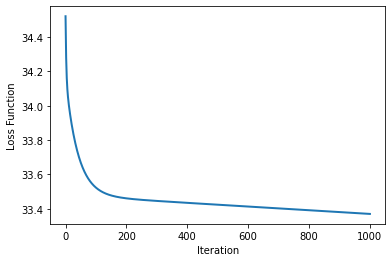

In [64]:
x = np.linspace(0, 1000, 1000)
y = lin_reg(d2_test, target_test, 0.001, w1_start=-0.5052362203721659, w2_start=4.259692892546455, w0_start=1.2703337153767915)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.xlabel('Iteration')
plt.ylabel("Loss Function")
plt.show()

Minimalna wartość funkcji kosztu jest wyższa niż dla liczonych wcześniej podzbiorach. Jest to jedak normalne zjawisko i właśnie dlatego dane dzielone są na treningowe i testowe - minimalizujemy w ten sposób wpływ przetrenowania modelu.

<h3> Uzupełnienie

In [ ]:
#podstawowe statystyki

x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [ ]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[2.77926919 0.19755123 3.28876392 2.3597231  1.33932004 2.26689586
 3.76502066 4.53868377 0.1311207  4.1017045 ]

[ 3.21672822  5.06219779 -6.46172483 -1.68390651  3.02334778 -2.73453689
 -1.47148044 -0.95295645 -4.75853528 -0.10640448]


In [ ]:
#pandas i normalizacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [ ]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [ ]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
